# Feature Effect Evaluation

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>

<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

In [1]:
config_file = "../config_sim_xgb-100_20240414.ini"
data_str = "20240414"  # e.g. "20240413"

# set up of example
sim_no = 1
n_train = 1000
noise_sd = 0.1

In [2]:
from configparser import ConfigParser
from joblib import load
import pandas as pd
from IPython.display import Markdown as md

from feature_effect_empirical_analysis.plotting.plots import boxplot_feature_effect_results, plot_effect_comparison
from feature_effect_empirical_analysis.data_generation import generate_data, Groundtruth

In [3]:
config = ConfigParser()
config.read(config_file)

['../config_sim_xgb-100_20240414.ini']

## PDP

### Error of Model-PD compared to groundtruth-PD

In [4]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("pdp_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,noise_sd,metric,x_1,x_2,x_3,x_4,x_5
0,0,XGBRegressor_20240414_1_1000_0.1,XGBRegressor,1,1000,0.1,mean_squared_error,0.016875,0.015341,0.020013,0.017393,0.006096
1,0,XGBRegressor_20240414_1_1000_0.5,XGBRegressor,1,1000,0.5,mean_squared_error,0.021464,0.024066,0.027774,0.021291,0.013897
2,0,XGBRegressor_20240414_2_1000_0.1,XGBRegressor,2,1000,0.1,mean_squared_error,0.015571,0.020568,0.023027,0.025449,0.011853
3,0,XGBRegressor_20240414_2_1000_0.5,XGBRegressor,2,1000,0.5,mean_squared_error,0.015402,0.024618,0.032997,0.031710,0.017810
4,0,XGBRegressor_20240414_3_1000_0.1,XGBRegressor,3,1000,0.1,mean_squared_error,0.013733,0.011819,0.021524,0.015494,0.009011
...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,XGBRegressor_20240415_30_1000_0.5,XGBRegressor,30,1000,0.5,mean_squared_error,0.020853,0.023353,0.028817,0.032572,0.012955
60,0,XGBRegressor_20240415_31_1000_0.1,XGBRegressor,31,1000,0.1,mean_squared_error,0.013859,0.013809,0.024484,0.017163,0.014294
61,0,XGBRegressor_20240415_31_1000_0.5,XGBRegressor,31,1000,0.5,mean_squared_error,0.018936,0.021358,0.021884,0.020799,0.023453
62,0,XGBRegressor_20240415_32_1000_0.1,XGBRegressor,32,1000,0.1,mean_squared_error,0.015783,0.014997,0.031242,0.023432,0.008912


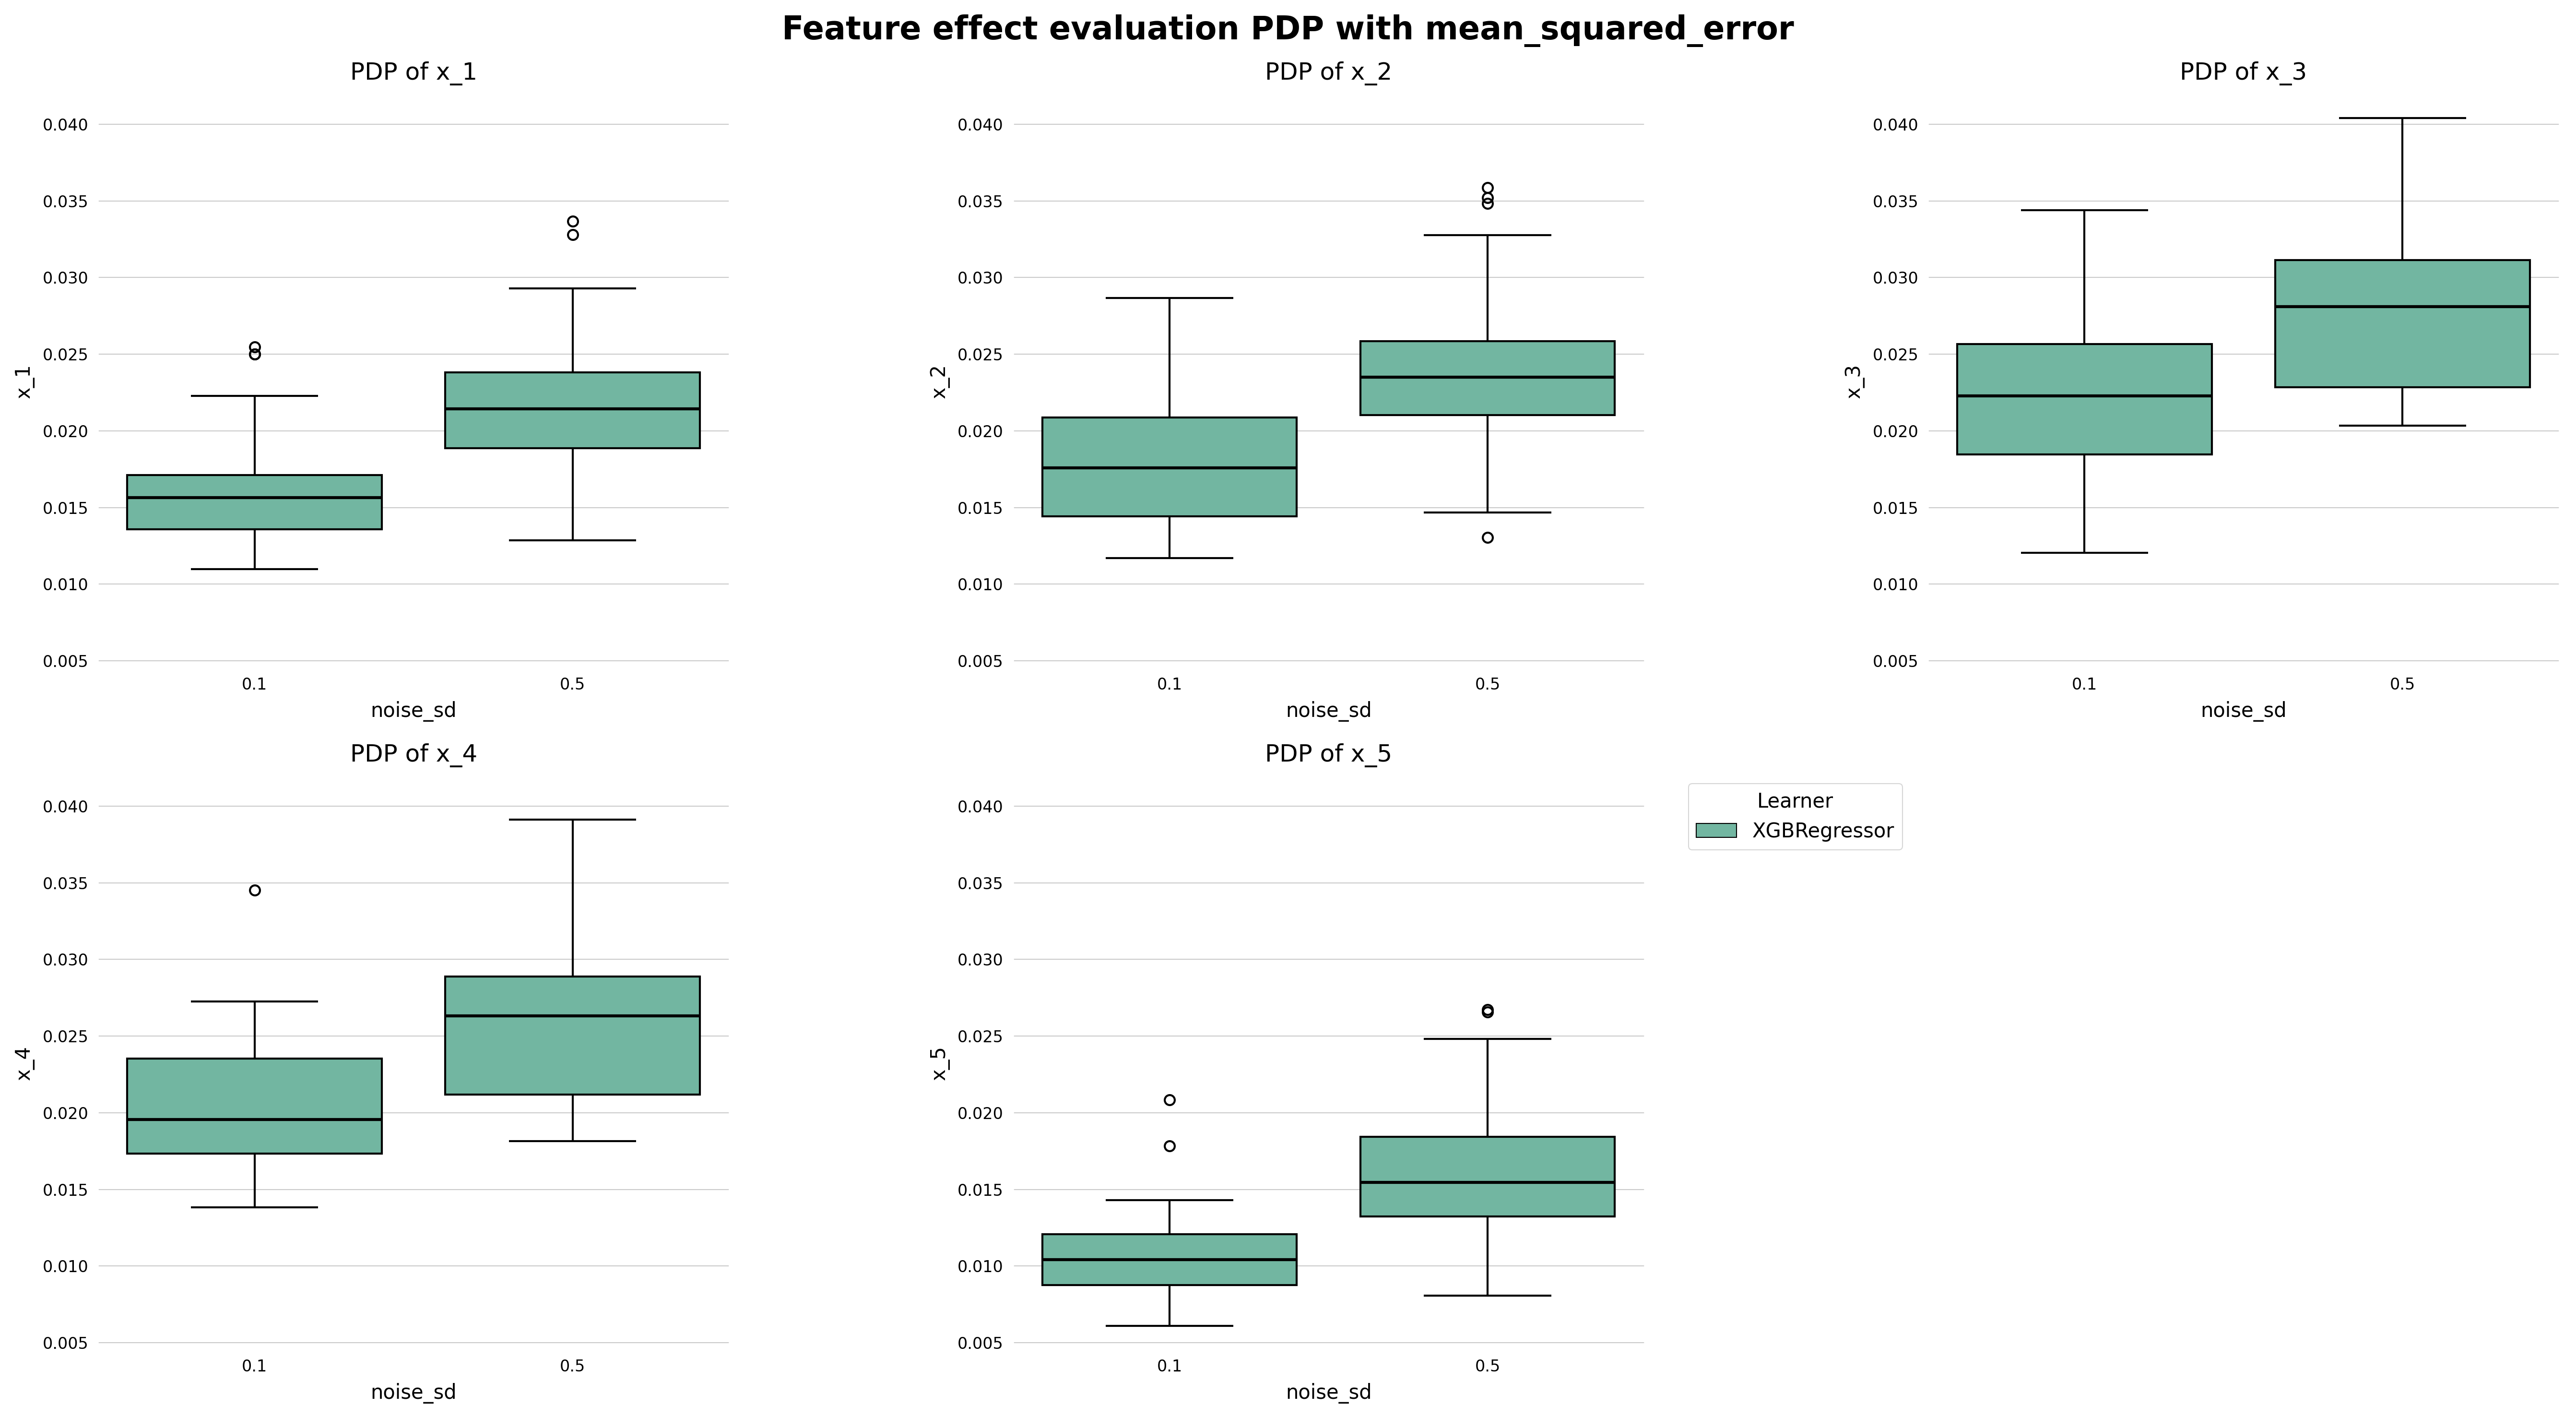

In [5]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4", "x_5"], df=df, effect_type="PDP");

### PDP example visualizations

In [6]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={noise_sd})")

(simulation no. 1 with n_train=1000 and noise_sd=0.1)

In [8]:
# recreate dataset
X_train, y_train, X_test, y_test = generate_data(1000, 1000, 0.1, seed=1)
# init groundtruth
groundtruth = Groundtruth()
# load models
# rf = load(f'../models/RandomForestRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
xgb = load(f'../models/XGBRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
# tree = load(f'../models/DecisionTreeRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
# svm = load(f'../models/SVR_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
# elasticnet = load(f'../models/ElasticNet_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
# gam = load(f'../models/GAM_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')

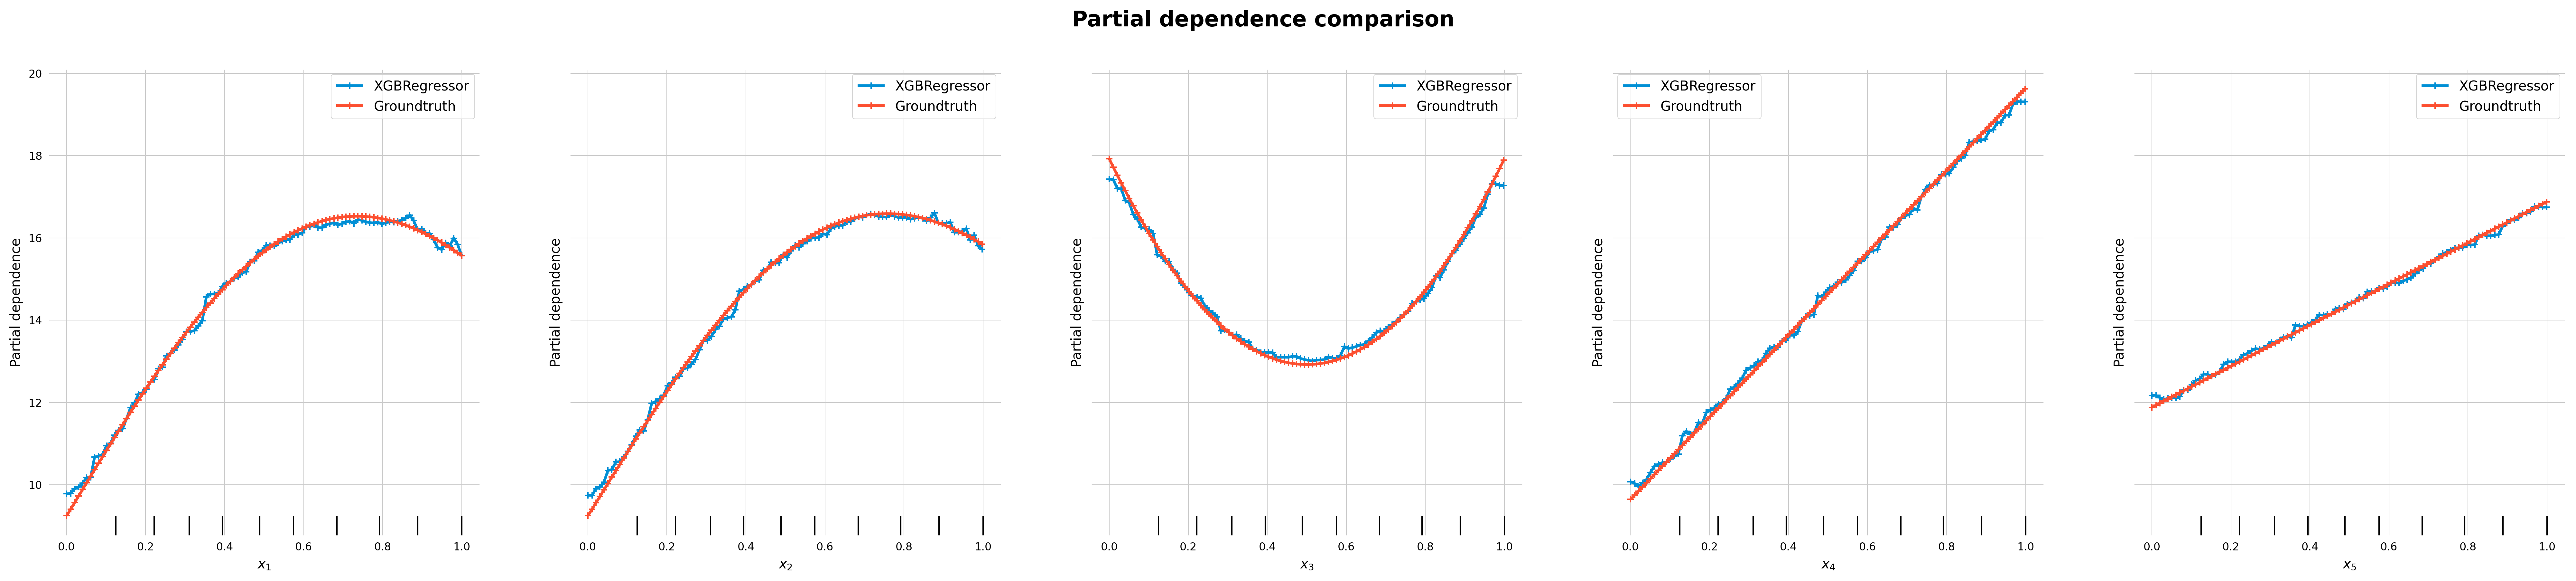

In [9]:
%matplotlib inline
plot_effect_comparison(xgb, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

## ALE

### Error of Model-ALE compared to groundtruth-ALE

In [10]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("ale_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,noise_sd,metric,x_1,x_2,x_3,x_4,x_5
0,0,XGBRegressor_20240414_1_1000_0.1,XGBRegressor,1,1000,0.1,mean_squared_error,0.088313,0.032658,0.044790,0.033427,0.033133
1,0,XGBRegressor_20240414_1_1000_0.5,XGBRegressor,1,1000,0.5,mean_squared_error,0.094882,0.087883,0.099508,0.028062,0.082043
2,0,XGBRegressor_20240414_2_1000_0.1,XGBRegressor,2,1000,0.1,mean_squared_error,0.069223,0.066510,0.016483,0.031998,0.052082
3,0,XGBRegressor_20240414_2_1000_0.5,XGBRegressor,2,1000,0.5,mean_squared_error,0.052993,0.062248,0.022821,0.032069,0.044360
4,0,XGBRegressor_20240414_3_1000_0.1,XGBRegressor,3,1000,0.1,mean_squared_error,0.051716,0.009275,0.013223,0.032149,0.023333
...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,XGBRegressor_20240415_30_1000_0.5,XGBRegressor,30,1000,0.5,mean_squared_error,0.031261,0.038349,0.035012,0.023414,0.012814
60,0,XGBRegressor_20240415_31_1000_0.1,XGBRegressor,31,1000,0.1,mean_squared_error,0.026828,0.061829,0.033838,0.076214,0.076257
61,0,XGBRegressor_20240415_31_1000_0.5,XGBRegressor,31,1000,0.5,mean_squared_error,0.018677,0.059380,0.020221,0.037685,0.032759
62,0,XGBRegressor_20240415_32_1000_0.1,XGBRegressor,32,1000,0.1,mean_squared_error,0.014850,0.086023,0.019607,0.096868,0.076265


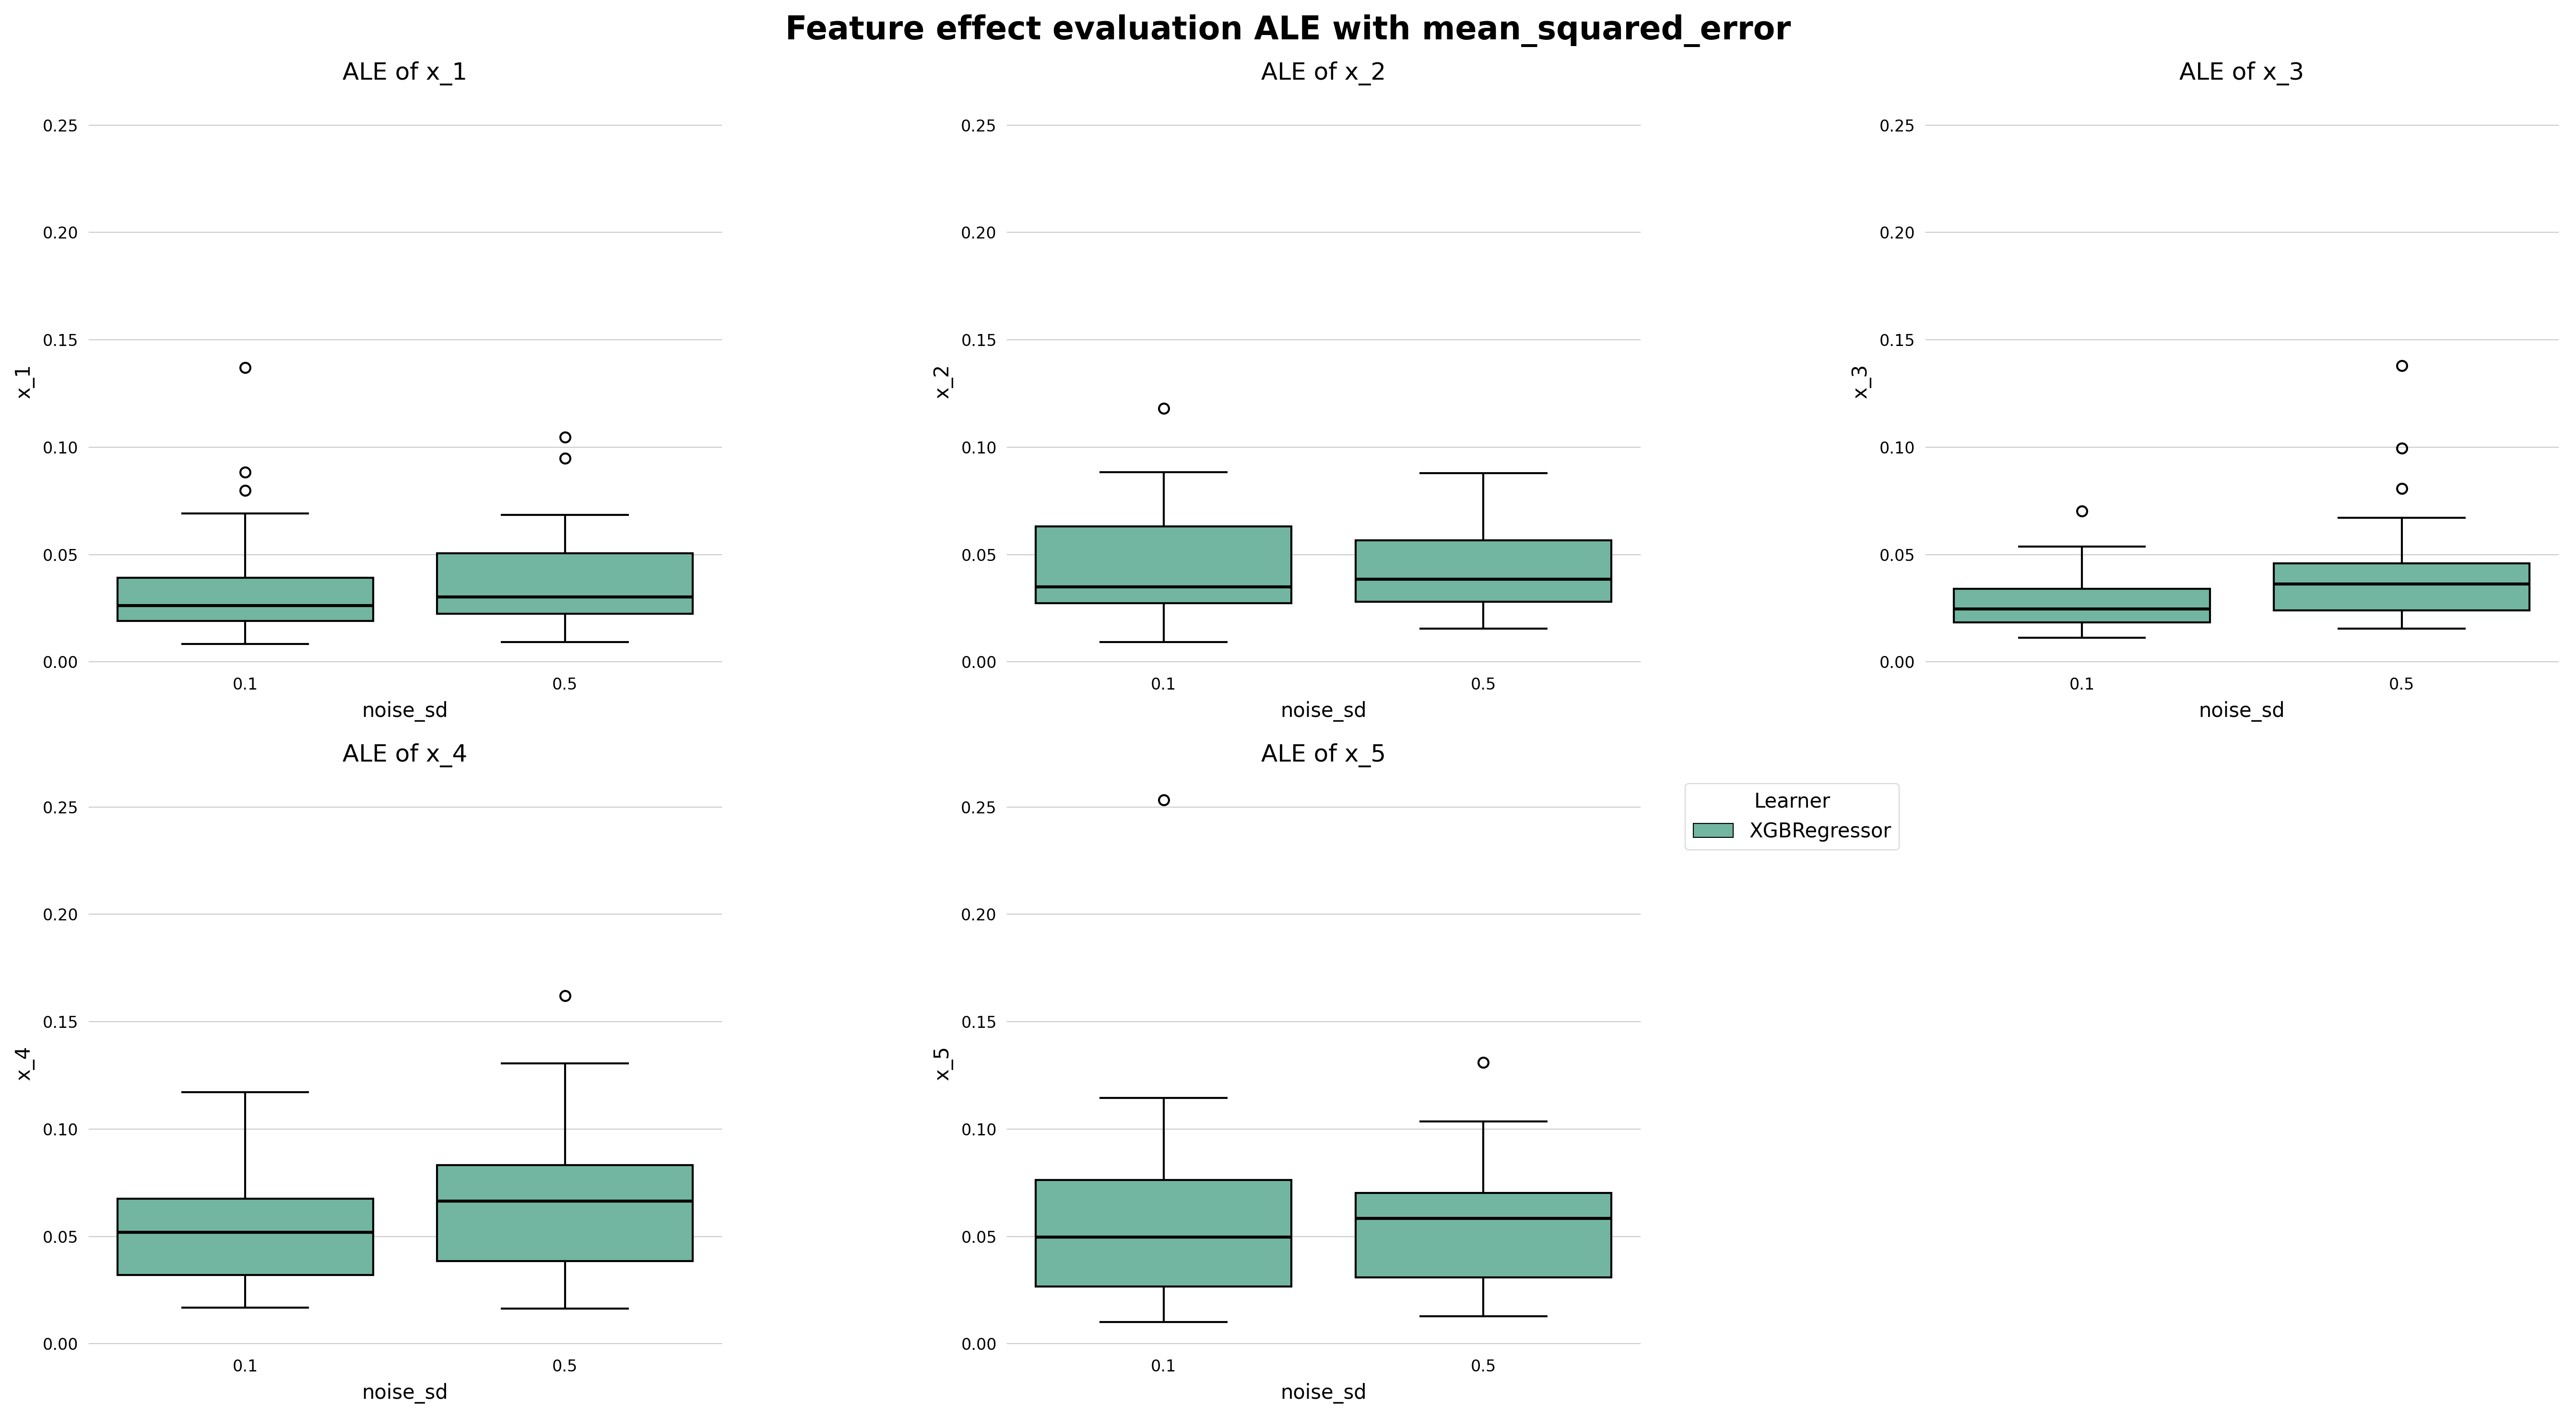

In [11]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4", "x_5"], df=df, effect_type="ALE");

### ALE example visualizations

In [12]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={noise_sd})")

(simulation no. 1 with n_train=1000 and noise_sd=0.1)

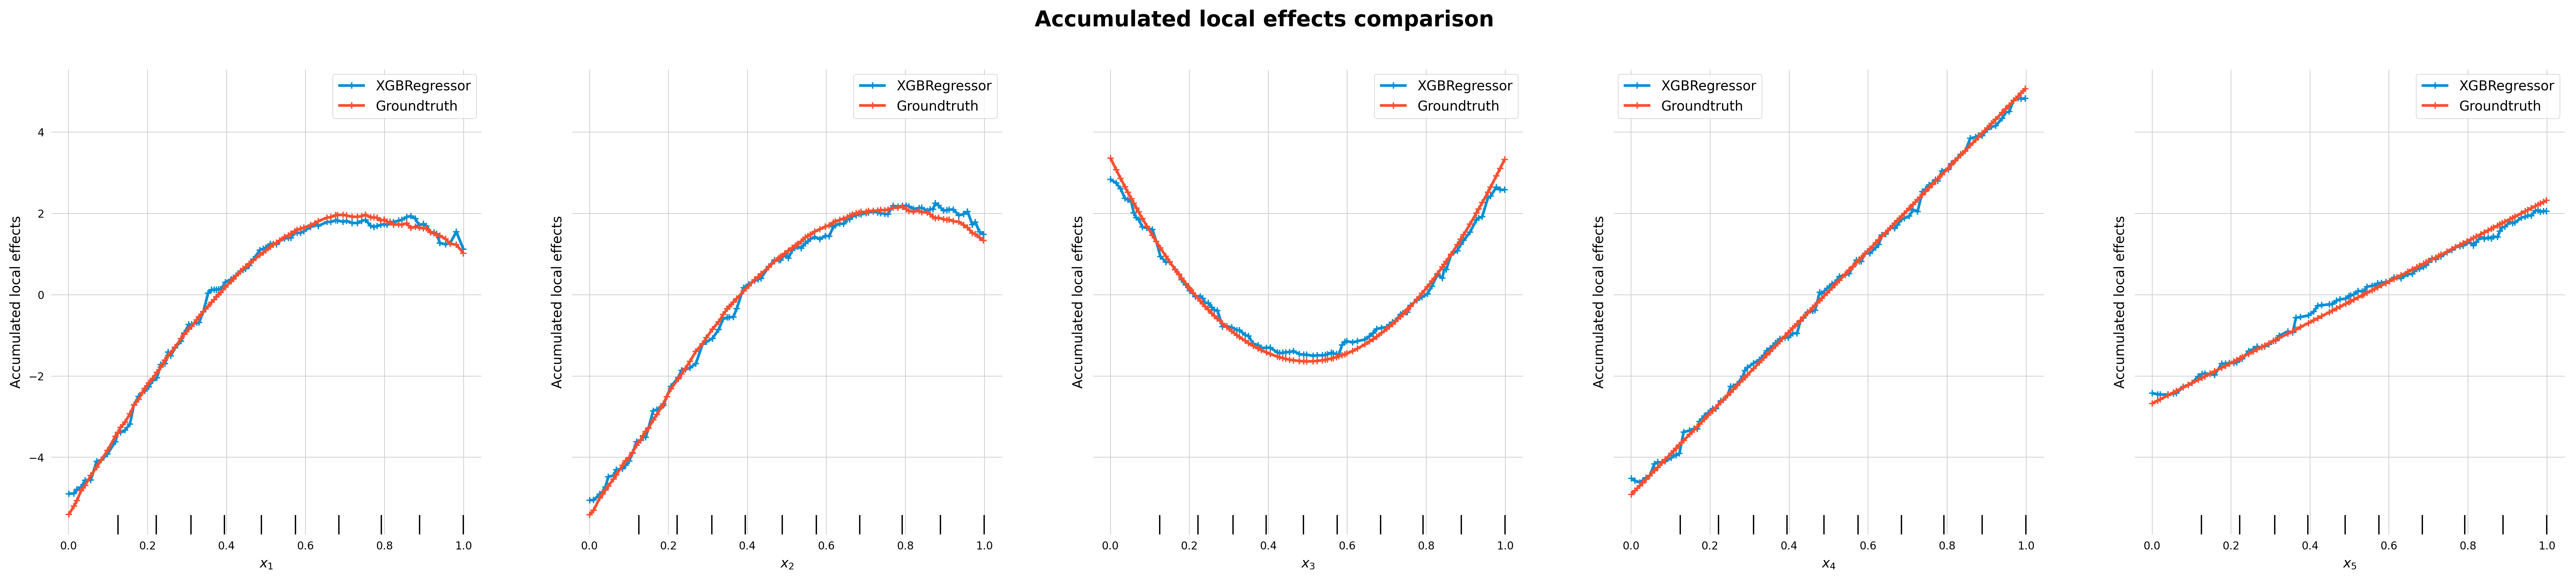

In [13]:
%matplotlib inline
plot_effect_comparison(xgb, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);